# CCSNet: a deep learning modeling suite for CO2 storage

The data set and pre-trained models were used in the above manuscript published in Advances in Water Resources

In [1]:
import numpy as np
import h5py
import scipy.io
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
import tensorflow as tf
from ReflectionPadding3D import ReflectionPadding3D
from utilities import *

<Figure size 432x288 with 0 Axes>

## 1. Data sets

The data set is available at https://drive.google.com/drive/folders/1SVZFkaxkAIjcGKew3rzGTmKW5tSBUGf7?usp=sharing 

*Note: variable name is same as file name.*

#### Train:
- Input: `train_x.h5`
- Gas saturation: `trian_y_SG.h5` 
- Reservoir pressure: `train_y_BPR.h5`
- Initial pressure: `train_y_P_init.h5`
- xCO2 molar fraction: `train_y_BXMF.h5`
- yCO2 molar fraction: `train_y_BYMF.h5`
- Liquid phase density: `train_y_BDENW.h5`
- Gas phase density: `train_y_BDENG.h5`

#### Test:
- Input: `test_x.h5`
- Gas saturation: `test_y_SG.h5` 
- Reservoir pressure: `test_y_BPR.h5`
- Initial pressure: `test_y_P_init.h5`
- xCO2 molar fraction: `test_y_BXMF.h5`
- yCO2 molar fraction: `test_y_BYMF.h5`
- Liquid phase density: `test_y_BDENW.h5`
- Gas phase density: `test_y_BDENG.h5`

In [2]:
test_x = get_dataset('test_x')
test_y_BPR = get_dataset('test_y_BPR')
test_y_P_init = get_dataset('test_y_P_init')
test_y_P = test_y_BPR - test_y_P_init
test_y_SG = get_dataset('test_y_SG')
test_y_BXMF = get_dataset('test_y_BXMF')
test_y_BYMF = get_dataset('test_y_BYMF')
test_y_BDENG = get_dataset('test_y_BDENG')
test_y_BDENW = get_dataset('test_y_BDENW')

## 2. Pre-trained models

The data set is available at https://drive.google.com/drive/folders/1SVZFkaxkAIjcGKew3rzGTmKW5tSBUGf7?usp=sharing 

- Gas saturation: `trained_models/SG_v1.h5` 
- Pressure buildup: `trained_models/dP_v1.h5`
- xCO2 molar fraction: `trained_models/bxmf_v1.h5`
- yCO2 molar fraction: `trained_models/bymf_v1.h5`
- Liquid phase density: `trained_models/bdenw_v1.h5`
- Gas phase density: `trained_models/bdeng_v1.h5`

In [3]:
SG_model = tf.keras.models.load_model('trained_models/SG_v1.h5', 
                                      custom_objects={'ReflectionPadding3D':ReflectionPadding3D}, compile=False)

dP_model = tf.keras.models.load_model('trained_models/dP_v1.h5', 
                                      custom_objects={'ReflectionPadding3D':ReflectionPadding3D}, compile=False)

BXMF_model = tf.keras.models.load_model('trained_models/bxmf_v1.h5', 
                                      custom_objects={'ReflectionPadding3D':ReflectionPadding3D}, compile=False)

BYMF_model = tf.keras.models.load_model('trained_models/bymf_v1.h5', 
                                      custom_objects={'ReflectionPadding3D':ReflectionPadding3D}, compile=False)

BDENG_model = tf.keras.models.load_model('trained_models/bdeng_v1.h5', 
                                      custom_objects={'ReflectionPadding3D':ReflectionPadding3D}, compile=False)

BDENW_model = tf.keras.models.load_model('trained_models/bdenw_v1.h5', 
                                      custom_objects={'ReflectionPadding3D':ReflectionPadding3D}, compile=False)

## 3. Prediction visulization

Here we show prediction examples of gas saturation, pressure buildup, and molar fraction of CO2 in the liquid phase. 

We have skipped the densites and gas phase molar fraction here since those are intermediate outputs.

In [4]:
sg, dp, bxmf, _, _, _ = predict_all(test_x[0:1,...], SG_model, dP_model, BXMF_model, BYMF_model, BDENG_model, BDENW_model)

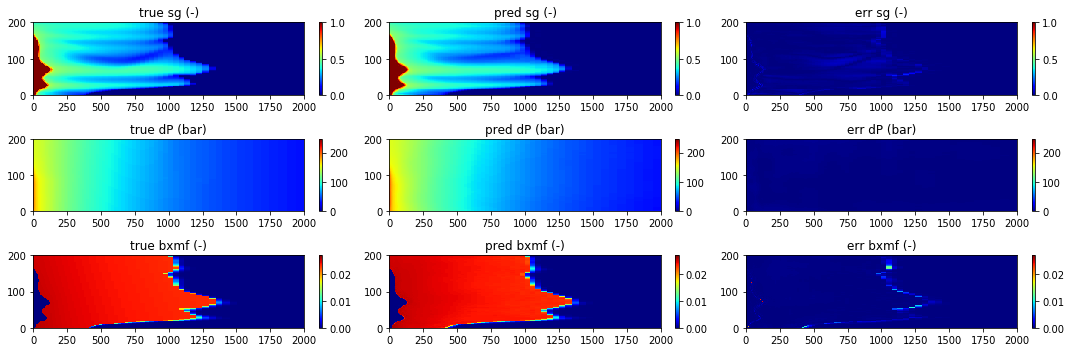

In [5]:
all_plot(test_y_SG[0,...], test_y_P[0,...], test_y_BXMF[0,...], sg, dp, bxmf)